In [28]:
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [29]:

conn = sqlite3.connect('atsm.db')  
cursor = conn.cursor()

In [30]:
import sqlite3

# Connect to the database file
conn = sqlite3.connect('atsm.db')  

# Create a cursor object to interact with the database
cursor = conn.cursor()

[0.08458198 0.04942645 0.05705434 0.22126294 0.09269338 0.05282601
 0.06952934 0.12056019 0.1290178  0.12304755]


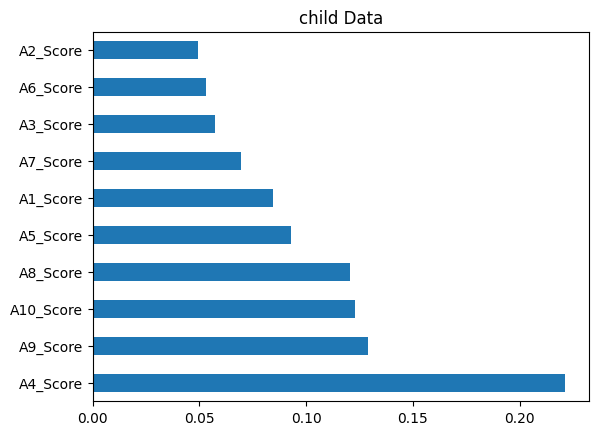

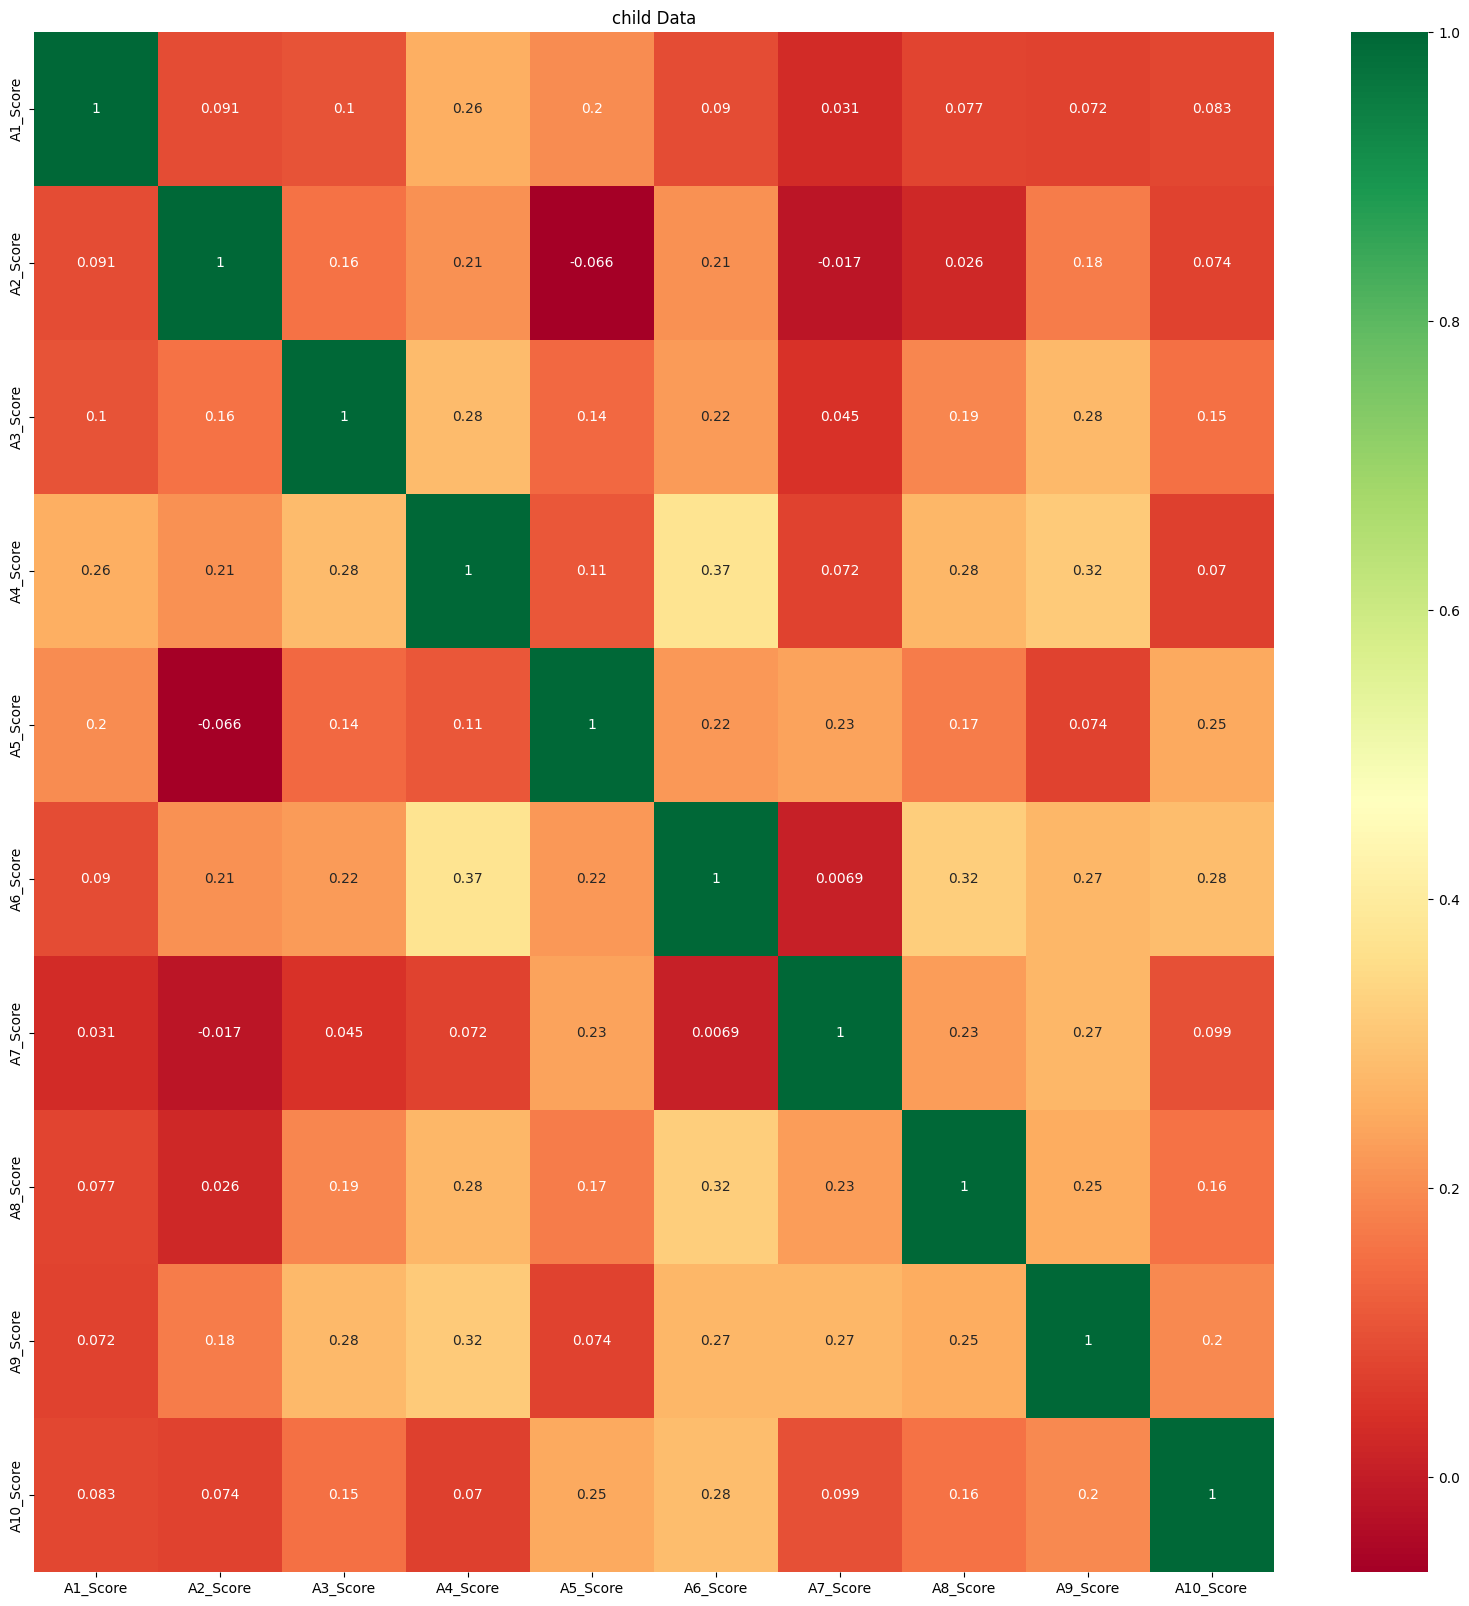

In [31]:
# query for table and read it into a dataframe
table = 'child'
query = f"SELECT * FROM {table}"
data = pd.read_sql(query, conn)
data = data.drop(0)
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)


X = data.iloc[:, :10]  # Independent columns
y = data.iloc[:, 20]    # Target col

model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importances
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title(f'{table} Data')
plt.show()

data.replace('?', np.nan, inplace=True)

# Convert columns to numeric type
numeric_columns = data.columns[:10]  
data[numeric_columns] = data[numeric_columns].astype(float)

# Replace missing values with column mean or median
numeric_data = data[numeric_columns]
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Correlation map
corrmat = numeric_data.corr()
top_corr_features = corrmat.columns.astype(str)

# Plot heat map
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.title(f'{table} Data')
plt.show()

[0.05493066 0.05889705 0.07487499 0.09115103 0.15047585 0.16671063
 0.07191503 0.06034211 0.22225037 0.04845229]


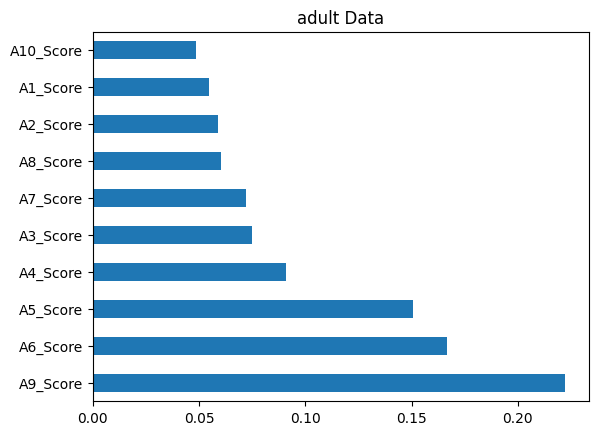

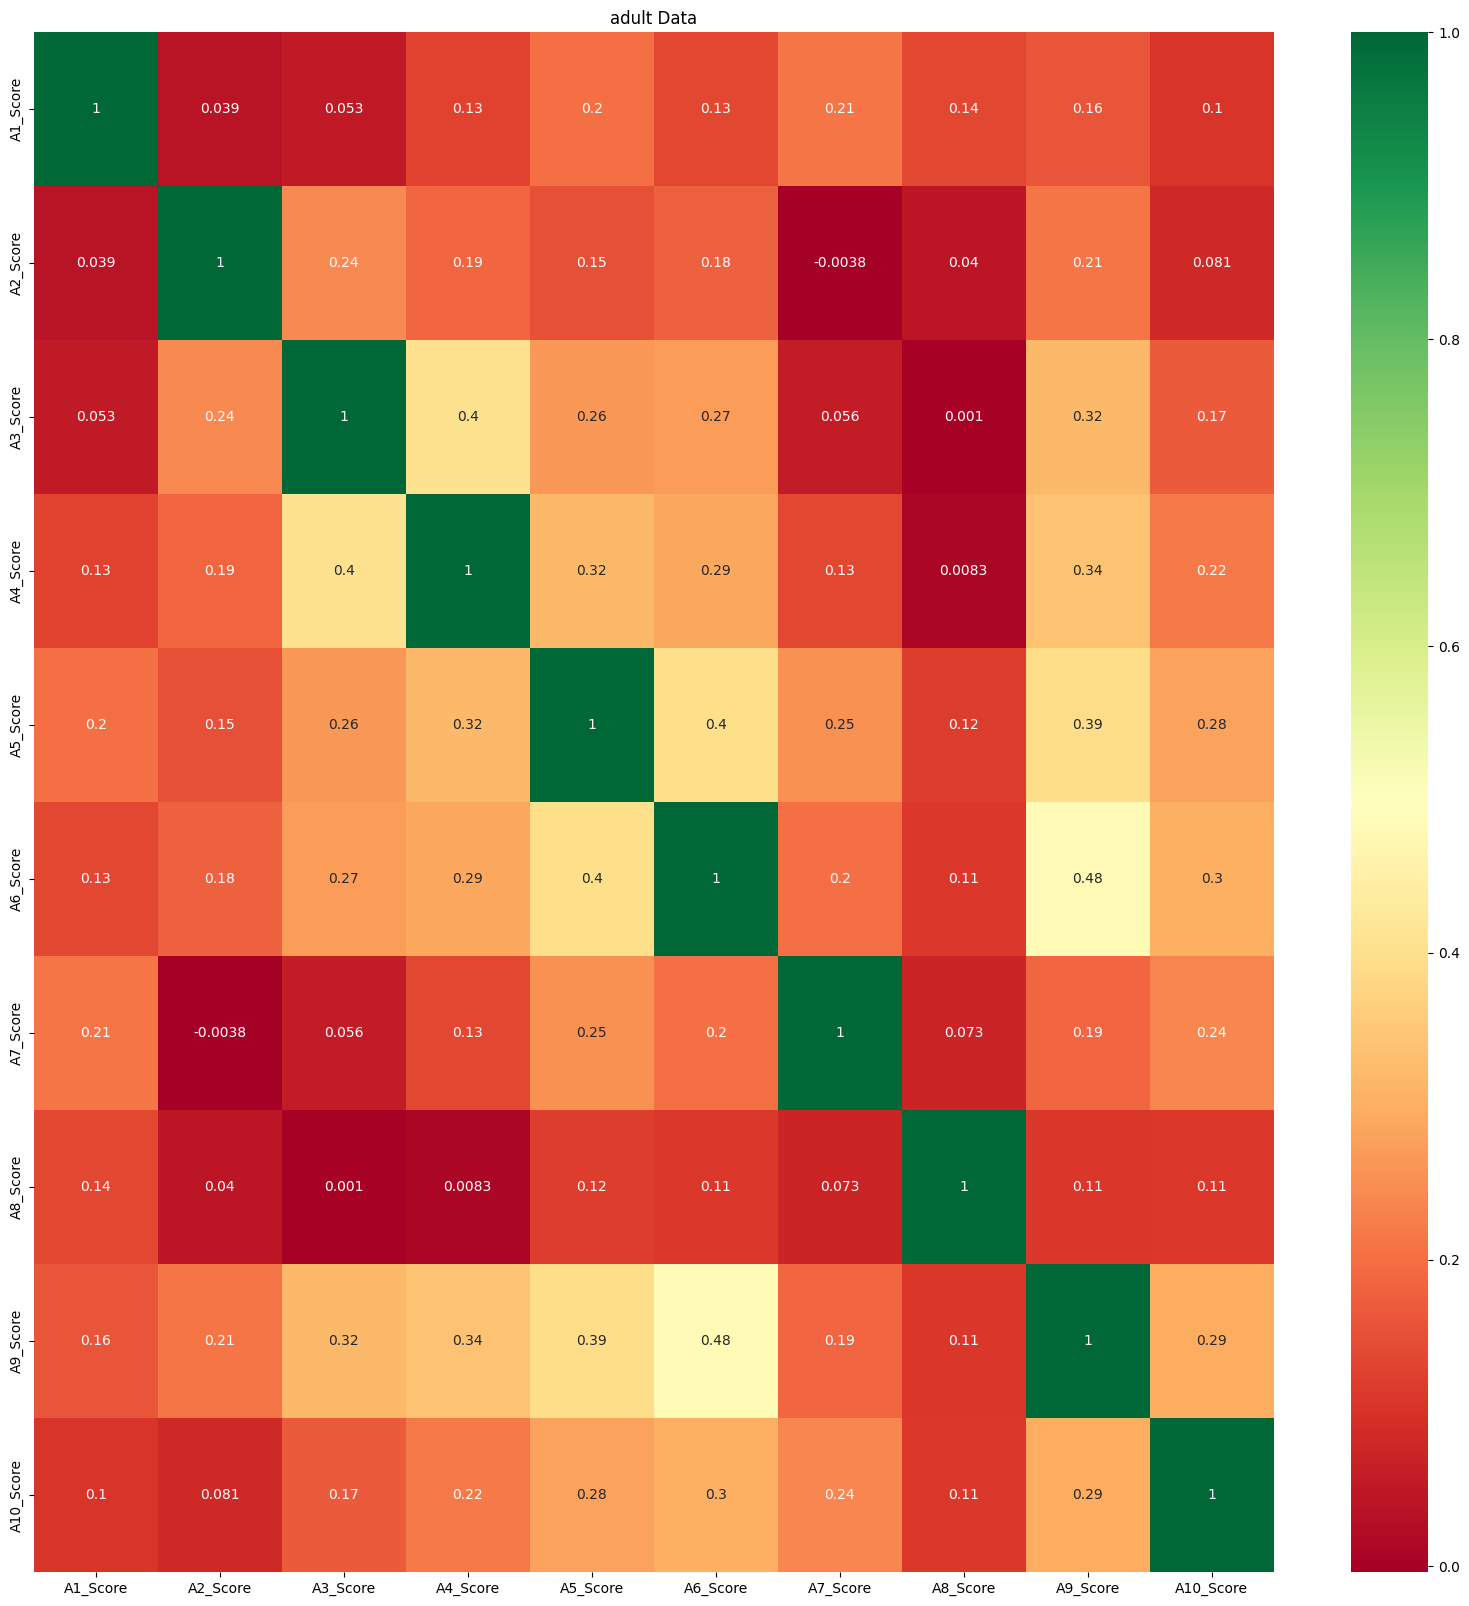

In [32]:
# query for table and read it into a dataframe
table = 'adult'
query = f"SELECT * FROM {table}"
data = pd.read_sql(query, conn)
data = data.drop(0)
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
X = data.iloc[:, :10]  # Independent columns
y = data.iloc[:, 20]    # Target col

model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importances
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title(f'{table} Data')
plt.savefig('adult_feature_importance.png')
plt.show()

data.replace('?', np.nan, inplace=True)

# Convert columns to numeric type
numeric_columns = data.columns[:10]  # Assuming the first column is the target column
data[numeric_columns] = data[numeric_columns].astype(float)

# Replace missing values with column mean or median
numeric_data = data[numeric_columns]
numeric_data.fillna(numeric_data.mean(), inplace=True)
# Alternatively, you can use median:
# numeric_data.fillna(numeric_data.median(), inplace=True)

# Get correlations of each feature in the dataset
corrmat = numeric_data.corr()
top_corr_features = corrmat.columns.astype(str)

# Plot heat map
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.title(f'{table} Data')
plt.savefig('adult_matrix.png')
plt.show()


[0.07883769 0.0517505  0.06179522 0.21663061 0.09266025 0.06155975
 0.07395007 0.11435382 0.12615321 0.12230889]


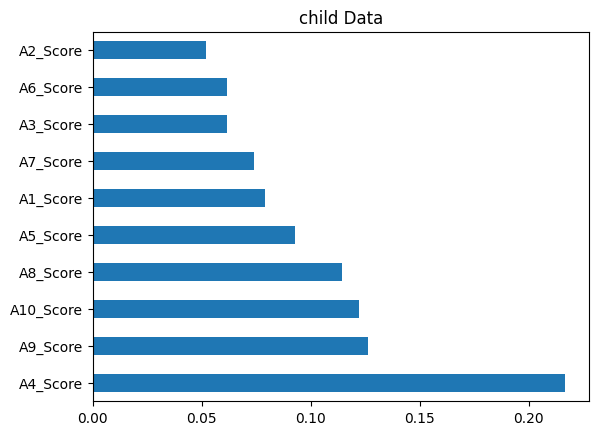

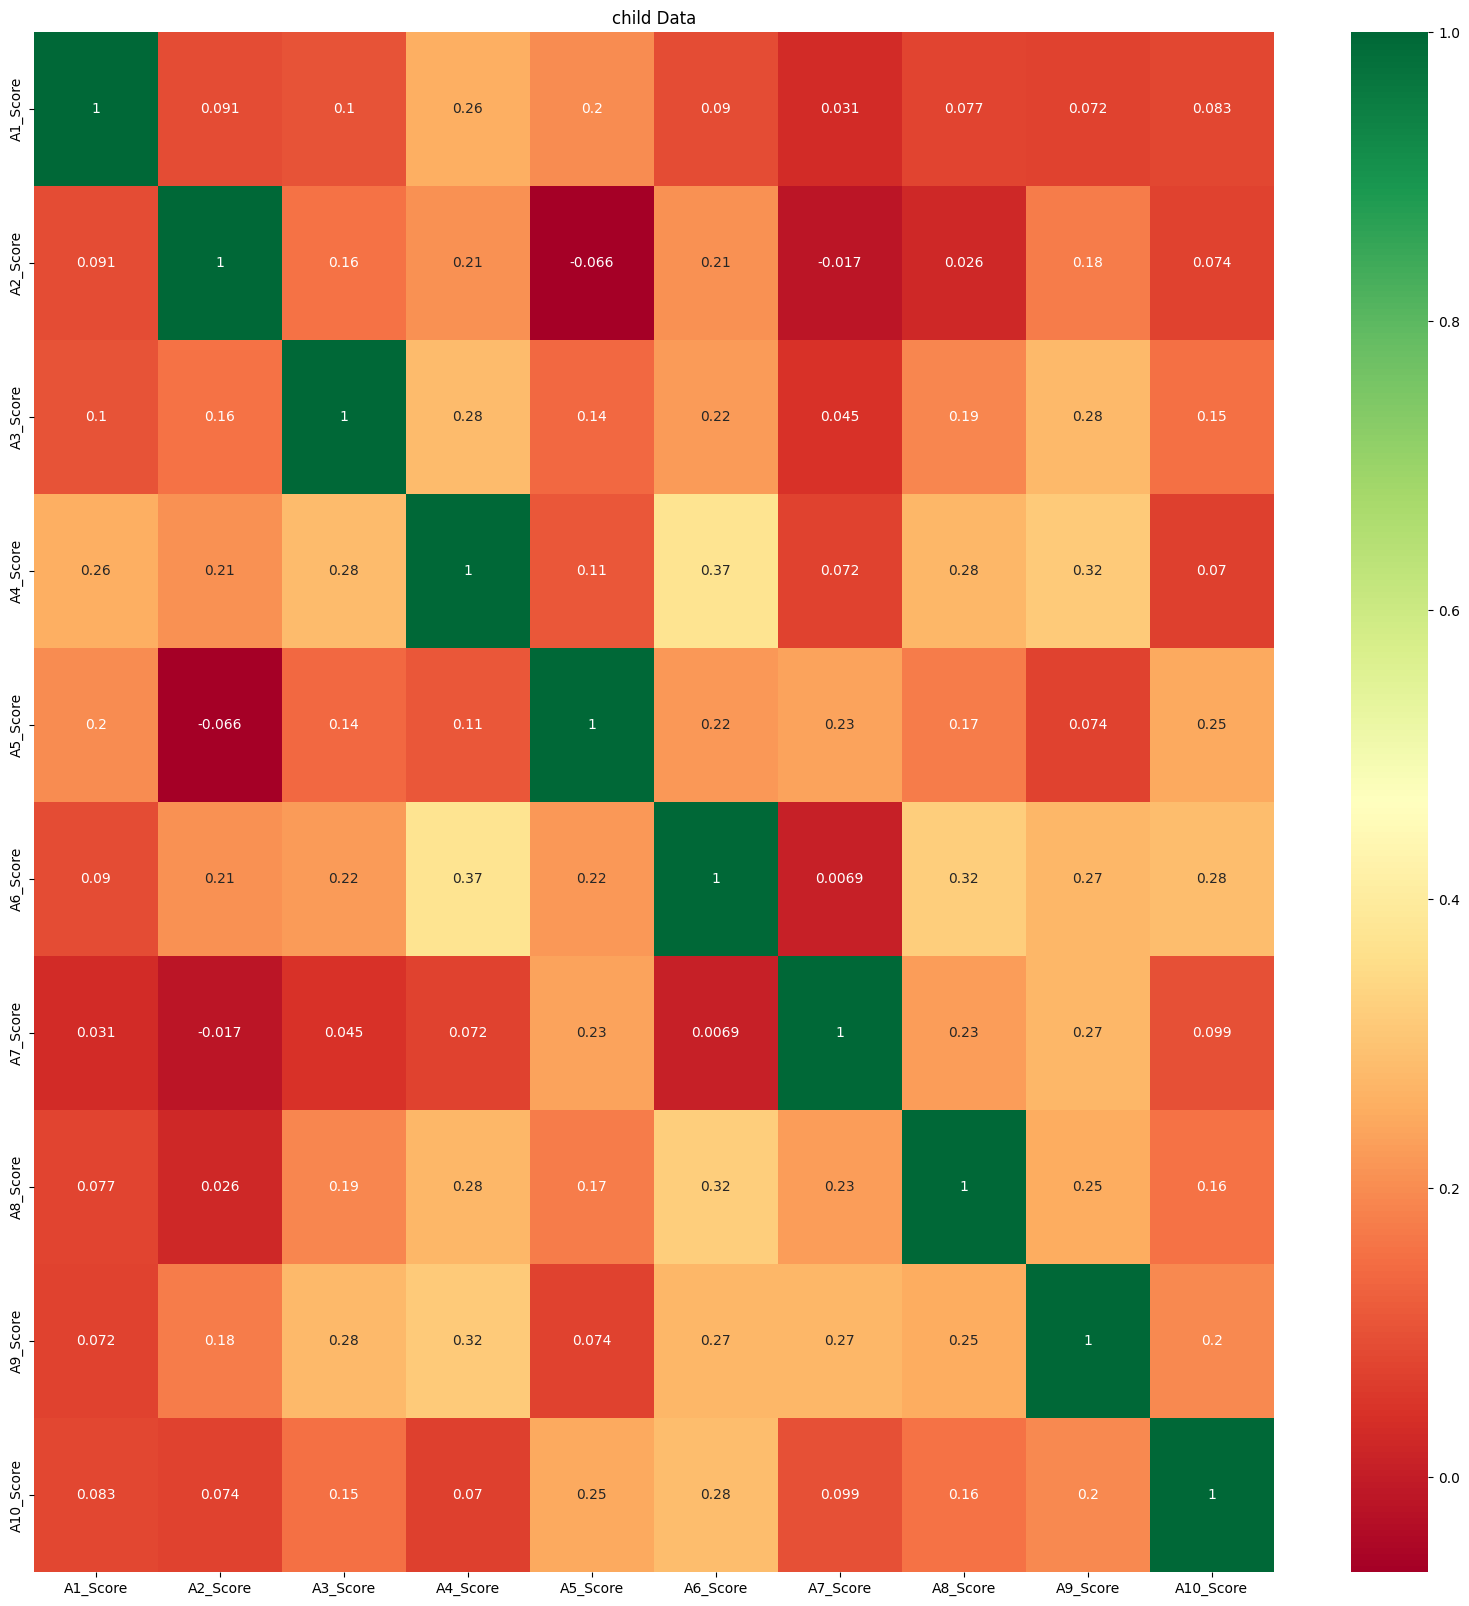

In [33]:
# Query through selected table
table = 'child'
query = f"SELECT * FROM {table}"
data = pd.read_sql(query, conn)
data = data.drop(0)
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)


X = data.iloc[:, :10]  
y = data.iloc[:, 20]    # Target col

model = ExtraTreesClassifier()
model.fit(X, y)

# print feature importances
print(model.feature_importances_)

# plot graph 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title(f'{table} Data')
plt.savefig('child_feature_importance.png')
plt.show()


numeric_columns = data.columns[:10]  # Assuming the first column is the target column
data[numeric_columns] = data[numeric_columns].astype(float)


numeric_data = data[numeric_columns]
numeric_data.fillna(numeric_data.mean(), inplace=True)


corrmat = numeric_data.corr()
top_corr_features = corrmat.columns.astype(str)

# heat map
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.title(f'{table} Data')
plt.savefig('child_matrix.png')
plt.show()